In [2]:
!conda install -c conda-forge geopy --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-3.1.0               |           py36_0         724 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         822 KB

The following NEW packages will be INSTALLED:

    altair:  3.1.0-py36_0 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge


folium-0.5.0         | 45 KB     | #################################

In [5]:
import pandas as pd
import numpy as np
import requests
#import geocoder
import os
import folium
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    new_york_data

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [7]:
new_york_data.shape

(306, 4)

In [8]:
#Plotting Neighbourhodds for Newyork city
new_york_data.groupby('Borough')['Neighborhood'].count()

Borough
Bronx            52
Brooklyn         70
Manhattan        40
Queens           81
Staten Island    63
Name: Neighborhood, dtype: int64

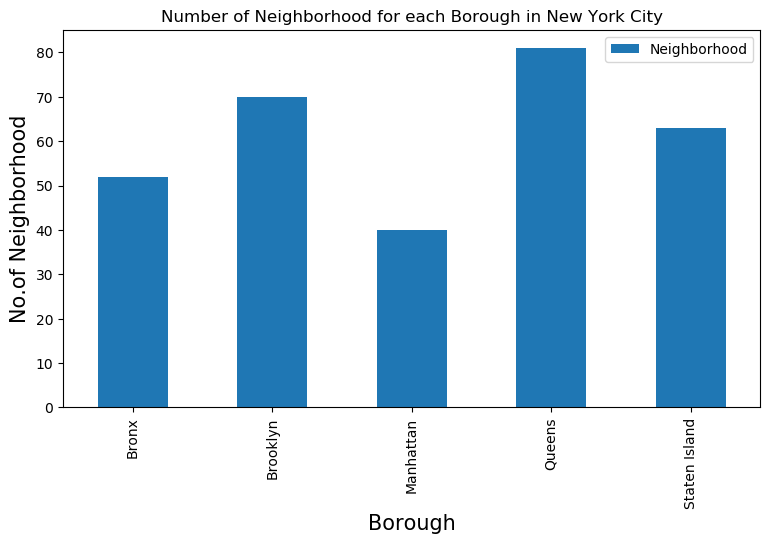

In [10]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [9]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100
    CLIENT_ID = 'MKJZWZCO4PRZ02VU4V5A3UTISALSP3NF5EXITGCH3ZOL55UI' # your Foursquare ID
    CLIENT_SECRET = 'B0CXW0GDJHYCQCD4J14RAKAOQFIKSNFRC10YZYLHSQW3ZY2J' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_data
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [10]:
# prepare neighborhood list that contains mexican resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
mexican_rest_ny=pd.DataFrame(columns=column_names)

for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    mexican_resturants=venues[venues['Category']=='Mexican Restaurant']
    print('Mexican Restaurant in '+Neighborhood)
    for resturant_detail in mexican_resturants.values.tolist():
        id, name , category=resturant_detail
        mexican_rest_ny = mexican_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
   
    

Mexican Restaurant in Wakefield
Mexican Restaurant in Co-op City
Mexican Restaurant in Eastchester
Mexican Restaurant in Fieldston
Mexican Restaurant in Riverdale
Mexican Restaurant in Kingsbridge
Mexican Restaurant in Marble Hill
Mexican Restaurant in Woodlawn
Mexican Restaurant in Norwood
Mexican Restaurant in Williamsbridge
Mexican Restaurant in Baychester
Mexican Restaurant in Pelham Parkway
Mexican Restaurant in City Island
Mexican Restaurant in Bedford Park
Mexican Restaurant in University Heights
Mexican Restaurant in Morris Heights
Mexican Restaurant in Fordham
Mexican Restaurant in East Tremont
Mexican Restaurant in West Farms
Mexican Restaurant in High  Bridge
Mexican Restaurant in Melrose
Mexican Restaurant in Mott Haven
Mexican Restaurant in Port Morris
Mexican Restaurant in Longwood
Mexican Restaurant in Hunts Point
Mexican Restaurant in Morrisania
Mexican Restaurant in Soundview
Mexican Restaurant in Clason Point
Mexican Restaurant in Throgs Neck
Mexican Restaurant in Cou

KeyError: 'groups'

In [52]:
 mexican_rest_ny.shape

(217, 4)

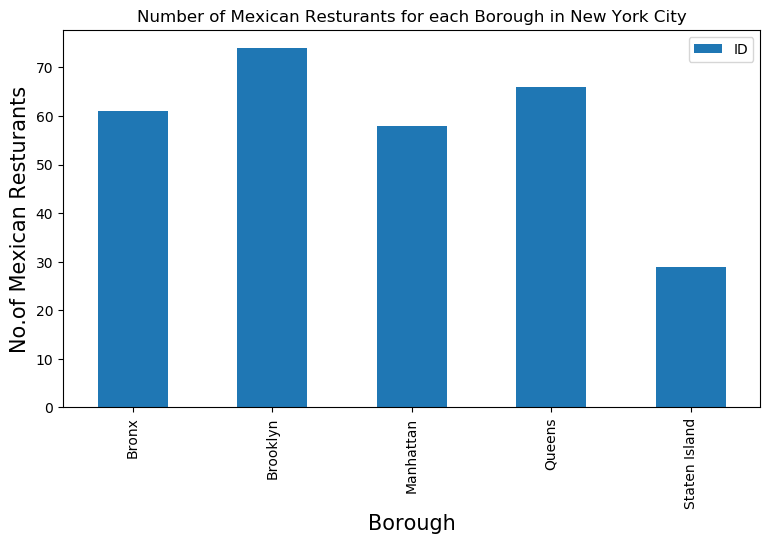

In [24]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Mexican Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Mexican Resturants', fontsize=15)
#giving a bar plot
mexican_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

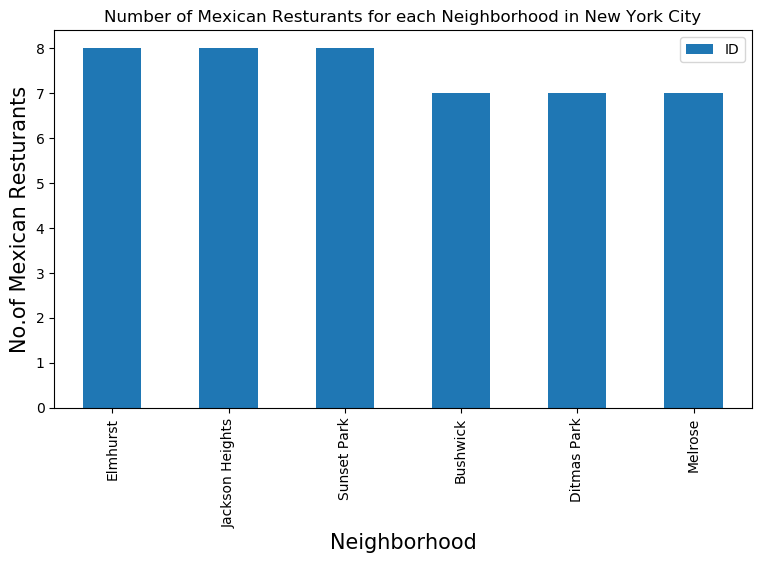

In [28]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Mexican Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Mexican Resturants', fontsize=15)
#giving a bar plot
mexican_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(6).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [31]:
mexican_rest_ny.groupby('Neighborhood')['ID'].count().idxmax()

'Elmhurst'

In [32]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Sunset Park'].count()

Borough         8
Neighborhood    8
ID              8
Name            8
dtype: int64

In [33]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Elmhurst'].count()

Borough         8
Neighborhood    8
ID              8
Name            8
dtype: int64

In [37]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Jackson Heights'].count()

Borough         8
Neighborhood    8
ID              8
Name            8
dtype: int64

In [29]:
mexican_rest_ny[mexican_rest_ny['Neighborhood']=='Sunset Park']

,Borough,Neighborhood,ID,Name
66,Brooklyn,Sunset Park,49bc364ff964a5201f541fe3,Tacos Matamoros
67,Brooklyn,Sunset Park,4b5415ecf964a520d3b127e3,Ricos Tacos
68,Brooklyn,Sunset Park,4b5cff55f964a520424e29e3,Maria's Bistro Mexicano
69,Brooklyn,Sunset Park,4c9521df82b56dcbc5fbd5aa,Tacos El Bronco Restaurant
70,Brooklyn,Sunset Park,4bc25f7c461576b0fd5d7d32,Puebla Mini Market / Tortas a la Plancha Don Pepe
71,Brooklyn,Sunset Park,4d6d976d792bb60cbdd156be,Tulcingo Restaurant
72,Brooklyn,Sunset Park,55a85c0f498ee3c735f1fa8d,Jalapeño Restaurant
73,Brooklyn,Sunset Park,4aa30695f964a520094320e3,Casa Vieja Restaurant


In [12]:
my_neighbourhood=mexican_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(6)
my_neighbourhood=pd.merge(my_neighbourhood,new_york_data, on='Neighborhood')


In [54]:
my_neighbourhood

,Neighborhood,ID,Borough,Latitude,Longitude
0,Elmhurst,8,Queens,40.744049,-73.881656
1,Jackson Heights,8,Queens,40.751981,-73.882821
2,Sunset Park,8,Brooklyn,40.645103,-74.010316
3,Bushwick,7,Brooklyn,40.698116,-73.925258
4,Melrose,7,Bronx,40.819754,-73.909422
5,East Harlem,6,Manhattan,40.792249,-73.944182


In [13]:
latitude = 40.715337
longitude = -74.008848

venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco




# add popular spots to the map as blue circle markers
for lat, lng, label in zip(my_neighbourhood.Latitude, my_neighbourhood.Longitude, my_neighbourhood.Neighborhood):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map